In [ ]:
# module import
import sklearn
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#data 준비
from sklearn.datasets import make_moons

X_moon, y_moon =  make_moons(n_samples = 1000, noise = 0.4, random_state = 53)

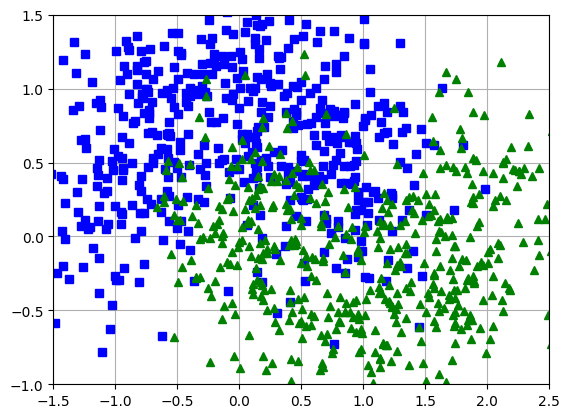

In [ ]:
# data 확인
plt.plot(X_moon[:, 0][y_moon==0], X_moon[:, 1][y_moon==0], 'bs')
plt.plot(X_moon[:, 0][y_moon==1], X_moon[:, 1][y_moon==1], 'g^')
plt.axis([-1.5, 2.5, -1, 1.5])
plt.grid(True, which = 'both')
plt.show()

In [ ]:
#data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moon, y_moon, test_size = 0.2, 
                                                    random_state = 42)

max_depth: 결정 트리의 최대 깊이 \
min_samples_split: 분할되기 위해 노드가 가져야 하는 최소 샘플 개수 \
min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 개수 \
min_weight_fraction_leaf: 가중치가 부여된 전체 샘플 수에서의 비율 \
max_leaf_nodes: 리프 노드의 최대 수 \
max_features: 각 노드에서 분할에 사용할 특성의 최대 수

In [ ]:
# 그리드 서치 적용
from sklearn.model_selection import GridSearchCV

# 모델 호출
moon_decision_tree = DecisionTreeClassifier()

# test할 parameter 지정
param_grid={
    "max_leaf_nodes":[3, 4, 5, 6, 7, 8],
    "min_samples_leaf":[10, 20, 30, 40, 50, 60]
}

# cross validation은 5로 지
moon_grid_search_cv = GridSearchCV(moon_decision_tree, 
                                   param_grid=param_grid,
                                   cv = 5, 
                                   scoring = 'accuracy', 
                                   return_train_score = True)

# 학습
moon_grid_search_cv.fit(X_train, y_train)
y_pred = moon_grid_search_cv.predict(X_test)
print("가장 좋은 성능을 가진 Model:", moon_grid_search_cv.best_estimator_)
print("점수:", moon_grid_search_cv.best_score_)

가장 좋은 성능을 가진 Model: DecisionTreeClassifier(max_leaf_nodes=4, min_samples_leaf=10)
점수: 0.85


In [ ]:
# 성능 평가
from sklearn.metrics import accuracy_score

y_pred = moon_grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.845

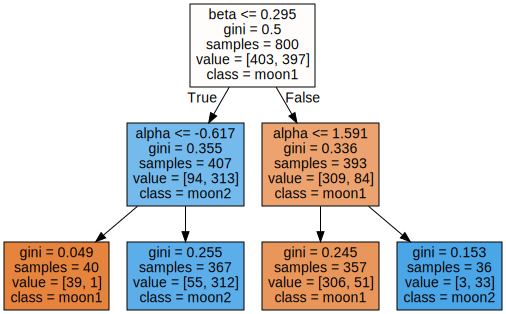

In [ ]:
# 트리 시각화
from sklearn import tree
import graphviz
best_tree = DecisionTreeClassifier(max_leaf_nodes=4, min_samples_leaf=10, random_state = 42)
best_tree.fit(X_train, y_train)
y_pred = moon_grid_search_cv.predict(X_test)

tree_dot = tree.export_graphviz(
    best_tree, 
    feature_names=['alpha', 'beta'], 
    class_names=['moon1', 'moon2'],
    filled=True
)

## draw graph using Graphviz
dt_graph = graphviz.Source(tree_dot, format='png')
dt_graph